# Quick book glancer

As a linguistic book editor, this tool is to give me the first impressions of the new job.

In [1]:
import random

#upload new book here
text = "sources/rur.txt"
text_cs = "sources/rur_cs.txt" 

with open(text, "r", encoding='utf-8') as text:
    content = text.read()
    
with open(text_cs, "r", encoding='utf-8') as text_cs:
    content_cs = text_cs.read()

#print random middle part of the book and translation
random_words = random.randint(round(len(content)/4), round(len(content) - len(content)/4))
random_words_cs = random.randint(round(len(content_cs)/4), round(len(content_cs) - len(content_cs)/4)) 

print("SOME RANDOM PART OF THE BOOK\n", content[random_words:random_words+600],
      "\n\n*******************************\n",
      "SOME RANDOM PART OF THE TRANSLATION\n", content_cs[random_words_cs:random_words_cs+600])


SOME RANDOM PART OF THE BOOK
 o, Fabry.

FABRY. _Your_ barricades! I can put twelve hundred volts into that
railing. (_HELENA is playing Rachmaninoff’s Elegie off L.1._)

DOMIN. Where’s Busman? (_DOMIN has left window and is walking up and
down stage across front._)

FABRY. Downstairs in the office. He’s working out some calculations.

DOMIN. I’ve called him. We must have a conference. (_Crosses to L._)

ALQUIST. Thank God Madame Helena can still play. (_HALLEMEIER crosses to
L.1 door, opens it slightly and listens to music. Enter BUSMAN L.2._)

FABRY. Look out, Bus--look out for the wires.

DR. GALL. What’s that you’re ca 

*******************************
 SOME RANDOM PART OF THE TRANSLATION
 č právě teď?

Helena: Oh, neptej se! Prosím tě, Harry, prosím vás, Galle, Hallemeiere,
    Alquiste, proboha vás prosím, zavřete tu továrnu a--

Domin: Lituji, Heleno. Ted' by nikdo z nás nemohl odjet.

Helena: Proč?

Domin: Protože chceme rozšířit výrobu Robotů.

Helena: Oh, teď--teď po té revol

### Getting some basic stats

In [2]:
length = round(len(content_cs)/1800)
rate_czk = 100

print('ESTIMATED NUMBER OF STANDARD PAGES - translation:')
print(length)
print('ESTIMATED COMPENSATION:')
print(str(length * rate_czk) + " CZK")

ESTIMATED NUMBER OF STANDARD PAGES - translation:
76
ESTIMATED COMPENSATION:
7600 CZK


### Getting better clue about the book

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

import matplotlib.pyplot as plt, seaborn as sns

lemmatizer = WordNetLemmatizer()

#some data cleaning
#tokenizing text + removing stopwords + lemmatizing

tokens = word_tokenize(content)
stops = stopwords.words('english') + ['said', 'saw', 'see']
clean_tokens = [token for token in tokens if token.lower() not in stops and token.isalnum()]
lemmas = [lemmatizer.lemmatize(token) for token in clean_tokens]
tagged = pos_tag(lemmas)

#some extra cleaning
#filtering only common nouns, adjectives and verbs

value_tags = ['NN', 'NNS', 'JJ', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
value_words = [word[0] for word in tagged if word[1] in value_tags]

freq = FreqDist(value_words)

#printing most common words

print('SOME MOST COMMON WORDS FROM THE BOOK\n')
print(freq.most_common(30))

SOME MOST COMMON WORDS FROM THE BOOK

[('work', 104), ('u', 79), ('know', 59), ('table', 53), ('go', 49), ('year', 43), ('man', 42), ('make', 39), ('hand', 37), ('factory', 36), ('come', 36), ('world', 34), ('human', 31), ('good', 28), ('want', 28), ('think', 28), ('window', 27), ('look', 27), ('everything', 27), ('electronic', 27), ('take', 26), ('life', 26), ('old', 25), ('thing', 25), ('say', 25), ('room', 24), ('mean', 24), ('cross', 23), ('term', 22), ('law', 22)]


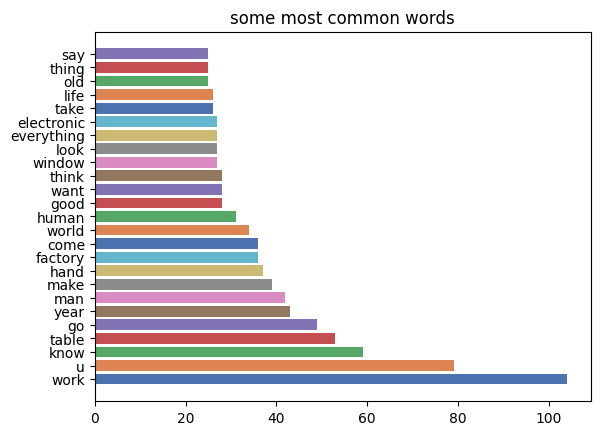

In [4]:
#plotting into bars
freq_dct_commons = dict(freq.most_common(25))

palette = sns.color_palette("deep")

plt.barh(list(freq_dct_commons.keys()), list(freq_dct_commons.values()), color=palette)
plt.title('some most common words')
plt.show()

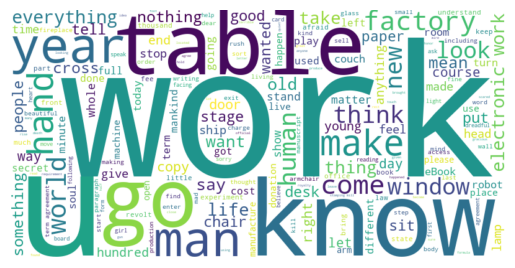

In [5]:
#as a word cloud
from wordcloud import WordCloud

text = " ".join(value_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[('electronic work', 27), ('human being', 17), ('term agreement', 9), ('stamping mill', 8), ('copyright law', 7), ('hold good', 7), ('set forth', 7), ('protected copyright', 6), ('beg pardon', 6), ('point view', 6), ('dissecting room', 6), ('school book', 5), ('hate u', 5), ('law country', 4), ('old man', 4), ('test tube', 4), ('let go', 4), ('want master', 4), ('hand hand', 4), ('work work', 4)] 



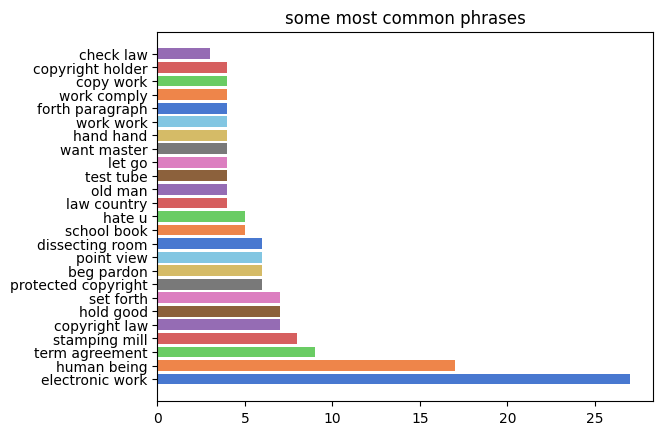

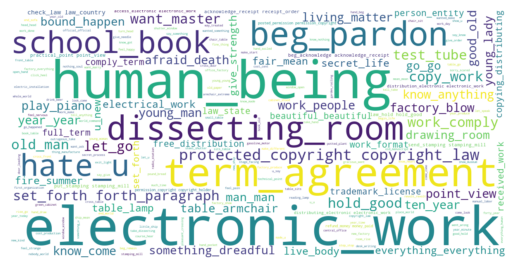

In [6]:
#experimenting with bigrams

from nltk.util import ngrams

#creating bigrams: 2word phrases + their frequency

bigrams = list(ngrams(value_words, 2))
joined_grams = [" ".join(gram) for gram in bigrams]
grammy_freq = FreqDist(joined_grams)

freq_bigrams = dict(FreqDist(bigrams))
print(grammy_freq.most_common(20), '\n')

#plotting them into bars

freq_dct_commons = dict(grammy_freq.most_common(25))

palette = sns.color_palette("muted")

plt.barh(list(freq_dct_commons.keys()), list(freq_dct_commons.values()), color=palette)
plt.title('some most common phrases')
plt.show()

#plotting underscored phrases into word cloud

grams_conc = ["_".join(gram) for gram in bigrams]
text = " ".join(grams_conc)

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Checking on my deadlines

In [7]:
import pandas as pd
from datetime import datetime, timedelta

schedule = pd.read_csv('sources/schedule.csv')

#defining steps
editing2 = schedule[schedule.Popis == "Finální redakce"]
proof = schedule[schedule.Popis == "Korektura 1"]

#date converter
def convert_date(step):
    start = step.iloc[0]['Od']
    end = step.iloc[0]['Do']
    start_formatted = datetime.strptime(start, "%d.%m.%Y").date()
    end_formatted = datetime.strptime(end, "%d.%m.%Y").date()
    return start_formatted, end_formatted

#counting days booked for given workflow without weekends
def count_weekdays(step):
    start, end = convert_date(step)
    days = (end - start).days
    weekdays = [day for day in range(days) if (start + timedelta(days=day)).weekday() < 5]
    return len(weekdays)

#counting average number of pages to do per day if I'm to meet deadlines
def pages_per_day(step):
    return round(length/count_weekdays(step), 2)
    
print(f'For second editing, you got {pages_per_day(editing2)} standard pages per day to edit.')
print(f'For proofreading, you got {pages_per_day(proof)} standard pages per day to read.')

For second editing, you got 2.53 standard pages per day to edit.
For proofreading, you got 3.62 standard pages per day to read.


#### I don't really care for standard pages - option to calculate Word or DTP pages manually:

In [8]:
def common_pages_day(total_pages, step):
    return round(float(total_pages)/count_weekdays(step), 2)

pages = common_pages_day(input('How many pages? '), editing2)
print(f'For second editing, you got {pages} Word pages per day to edit.')
pages_proof = common_pages_day(input('How many pages? '), proof)
print(f'For proofreading, you got {pages_proof} printed pages per day to read.')

How many pages?  150


For second editing, you got 5.0 Word pages per day to edit.


How many pages?  250


For proofreading, you got 11.9 printed pages per day to read.
